In [201]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [407]:
#load the dataset
df = pd.read_csv('flight_price.csv')

In [408]:
df

,Unnamed: 0,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price
0,0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,"2,341"
1,1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,"2,621"
2,2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,"2,621"
3,3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,"2,658"
4,4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,"2,715"
...,...,...,...,...,...,...,...,...,...,...
1665,1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,"5,255"
1666,1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,"5,255"
1667,1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,"5,255"
1668,1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,"5,358"


In [409]:
#checking for null values
df.isnull().sum()

Unnamed: 0           0
airline_name         0
date_of_journey      0
source               0
destination          0
departure_time       0
arrival_time         0
duration             0
total_stops        441
price                0
dtype: int64

In [410]:
#fill null columns
df.fillna(method='ffill')
df.total_stops = df.total_stops.fillna('non-stop')

In [411]:
#checking for null values
df.isnull().sum()

Unnamed: 0         0
airline_name       0
date_of_journey    0
source             0
destination        0
departure_time     0
arrival_time       0
duration           0
total_stops        0
price              0
dtype: int64

In [412]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [413]:
print (df.dtypes)

airline_name       object
date_of_journey    object
source             object
destination        object
departure_time     object
arrival_time       object
duration           object
total_stops        object
price              object
dtype: object


In [414]:
df['price'] = df['price'].replace(',','', regex=True).astype(float)

In [415]:
df['total_stops'] = df['total_stops'].replace('non-stop','0', regex=True)

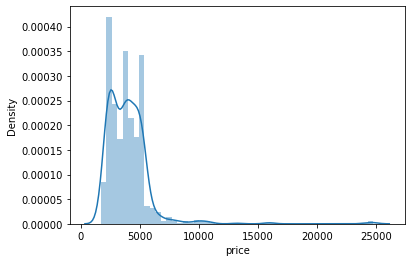

In [416]:
#The distribution of review sentiment polarity score
ax = sns.distplot(df['price'])

In [417]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,2341.0
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,2621.0
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,2621.0
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,2658.0
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,2715.0
...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,5255.0
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,5255.0
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,5255.0
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,5358.0


[Text(0.5, 0, 'Airline Name'), Text(0, 0.5, 'Count')]

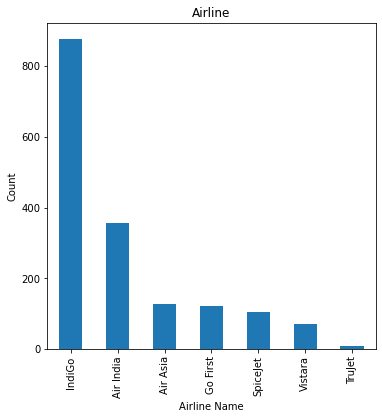

In [418]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = df['airline_name'].value_counts().plot(kind='bar')
plt.title('Airline')
plt1.set(xlabel = 'Airline Name', ylabel='Count')

Text(0.5, 0, 'Airline')

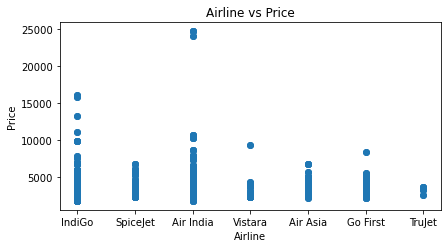

In [419]:
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
plt.scatter(df['airline_name'],df['price'])
plt.title('Airline vs Price')
plt.ylabel('Price')
plt.xlabel('Airline')

Text(0.5, 0, 'Date')

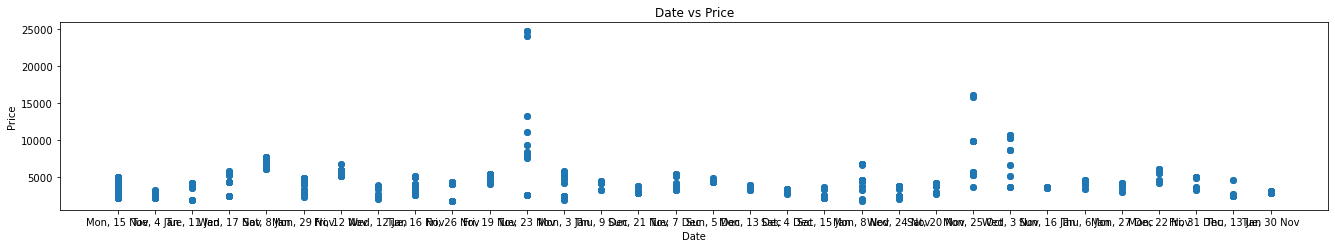

In [420]:
plt.figure(figsize=(50,20))
plt.subplot(5,2,1)
plt.scatter(df['date_of_journey'],df['price'])
plt.title('Date vs Price')
plt.ylabel('Price')
plt.xlabel('Date')

In [421]:
category = ['airline_name','source','destination','total_stops']

In [422]:
for i in category:
    print(i,df[i].unique())

airline_name ['IndiGo' 'SpiceJet' 'Air India' 'Vistara' 'Air Asia' 'Go First' 'TruJet']
source ['New Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Pune' 'Chennai'
 'Patna']
destination ['Chennai' 'Hyderabad' 'Goa' 'Bangalore' 'Mumbai' 'Port Blair' 'Imphal'
 'Vijayawada' 'Jammu' 'Trivandrum' 'Varanasi' 'Chandigarh' 'Dehradun'
 'Coimbatore' 'Kolkata' 'Kochi' 'Indore' 'Mangalore' 'New Delhi' 'Jaipur'
 'Lucknow' 'Guwahati' 'Surat' 'Nagpur' 'Tirupati' 'Ahmedabad'
 'Rajahmundry' 'Aurangabad' 'Pune' 'Srinagar']
total_stops ['2 Stops' '1 Stop' '0' '3 Stops' '2 Stop(s)' '3 Stop(s)']


In [423]:
splitted = df.date_of_journey.str.split(" ")

In [424]:
df['month'] = splitted.str[2]

In [425]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,20:30,23:20,2h 50m,2 Stops,2341.0,Nov
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,18:25,21:10,2h 45m,1 Stop,2621.0,Nov
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,06:15,09:10,2h 55m,1 Stop,2621.0,Nov
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,20:40,23:35,2h 55m,1 Stop,2658.0,Nov
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,13:30,16:20,2h 50m,1 Stop,2715.0,Nov
...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,08:15\n+ 1 day,13h 25m,1 Stop,5255.0,Nov
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,08:45,08:15\n+ 1 day,23h 30m,1 Stop,5255.0,Nov
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,18:50,19:40\n+ 1 day,24h 50m,1 Stop,5255.0,Nov
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,15:30,22:15,6h 45m,1 Stop,5358.0,Nov


In [426]:
df['total_stops'] = df['total_stops'].str.split(" ")
df['total_stops'] = df['total_stops'].str[0]

In [427]:
df['hours'] = df['duration'].str.split(" ")
df['hours'] = df['hours'].str[0]


In [428]:
df['hours'] = df['hours'].str.split("h")
df['hours'] = df['hours'].str[0]

In [429]:
df['mins'] = df['duration'].str.split(" ")
df['mins'] = df['mins'].str[1]
df['mins'] = df['mins'].str.split("m")
df['mins'] = df['mins'].str[0]

In [430]:
df['arrival_time'] = df['arrival_time'].str.split(":")
df['arrival_time_hour'] = df['arrival_time'].str[0]
df['arrival_time_min'] = df['arrival_time'].str[1]


In [431]:
df['arrival_time_min'] = df['arrival_time_min'].str.split("\n")

In [432]:
df['arrival_time_min'] = df['arrival_time_min'].str[0]

In [433]:
df['departure_time'] = df['departure_time'].str.split(":")
df['departure_time_hour'] = df['departure_time'].str[0]
df['departure_time_min'] = df['departure_time'].str[1]

In [434]:
df['hours'] = df['hours'].astype('int64')
df['mins'] = df['mins'].astype('int64')
df['total_stops'] = df['total_stops'].astype('int64')
df['arrival_time_hour'] = df['arrival_time_hour'].astype('int64')
df['arrival_time_min'] = df['arrival_time_min'].astype('int64')
df['departure_time_hour'] = df['departure_time_hour'].astype('int64')
df['departure_time_min'] = df['departure_time_min'].astype('int64')

In [435]:
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min,departure_time_hour,departure_time_min
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,"[20, 30]","[23, 20]",2h 50m,2,2341.0,Nov,2,50,23,20,20,30
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,"[18, 25]","[21, 10]",2h 45m,1,2621.0,Nov,2,45,21,10,18,25
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,"[06, 15]","[09, 10]",2h 55m,1,2621.0,Nov,2,55,9,10,6,15
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,"[20, 40]","[23, 35]",2h 55m,1,2658.0,Nov,2,55,23,35,20,40
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,"[13, 30]","[16, 20]",2h 50m,1,2715.0,Nov,2,50,16,20,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,"[18, 50]","[08, 15\n+ 1 day]",13h 25m,1,5255.0,Nov,13,25,8,15,18,50
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,"[08, 45]","[08, 15\n+ 1 day]",23h 30m,1,5255.0,Nov,23,30,8,15,8,45
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,"[18, 50]","[19, 40\n+ 1 day]",24h 50m,1,5255.0,Nov,24,50,19,40,18,50
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,"[15, 30]","[22, 15]",6h 45m,1,5358.0,Nov,6,45,22,15,15,30


In [436]:
import calendar
look_up = {'Jan':'01', 'Feb':'02' ,  'Mar':'03',  'Apr':'04', 'May':'05' ,
            'Jun':'06' ,  'Jul':'07',  'Aug':'08',  'Sep':'09',  'Oct':'10',  'Nov':'11','Dec': '12'}

df['month'] = df['month'].apply(lambda x: look_up[x])
df

,airline_name,date_of_journey,source,destination,departure_time,arrival_time,duration,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min,departure_time_hour,departure_time_min
0,IndiGo,"Mon, 15 Nov",New Delhi,Chennai,"[20, 30]","[23, 20]",2h 50m,2,2341.0,11,2,50,23,20,20,30
1,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,"[18, 25]","[21, 10]",2h 45m,1,2621.0,11,2,45,21,10,18,25
2,SpiceJet,"Mon, 15 Nov",New Delhi,Chennai,"[06, 15]","[09, 10]",2h 55m,1,2621.0,11,2,55,9,10,6,15
3,Air India,"Mon, 15 Nov",New Delhi,Chennai,"[20, 40]","[23, 35]",2h 55m,1,2658.0,11,2,55,23,35,20,40
4,Vistara,"Mon, 15 Nov",New Delhi,Chennai,"[13, 30]","[16, 20]",2h 50m,1,2715.0,11,2,50,16,20,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,Air India,"Fri, 19 Nov",Pune,Lucknow,"[18, 50]","[08, 15\n+ 1 day]",13h 25m,1,5255.0,11,13,25,8,15,18,50
1666,Air India,"Fri, 19 Nov",Pune,Lucknow,"[08, 45]","[08, 15\n+ 1 day]",23h 30m,1,5255.0,11,23,30,8,15,8,45
1667,Air India,"Fri, 19 Nov",Pune,Lucknow,"[18, 50]","[19, 40\n+ 1 day]",24h 50m,1,5255.0,11,24,50,19,40,18,50
1668,Go First,"Fri, 19 Nov",Pune,Lucknow,"[15, 30]","[22, 15]",6h 45m,1,5358.0,11,6,45,22,15,15,30


In [437]:
df['month'] = df['month'].astype('int64')

In [438]:
df.drop(columns=['arrival_time','duration','departure_time'],inplace=True)

airline_name ['IndiGo' 'SpiceJet' 'Air India' 'Vistara' 'Air Asia' 'Go First' 'TruJet']
source ['New Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Pune' 'Chennai'
 'Patna']
destination ['Chennai' 'Hyderabad' 'Goa' 'Bangalore' 'Mumbai' 'Port Blair' 'Imphal'
 'Vijayawada' 'Jammu' 'Trivandrum' 'Varanasi' 'Chandigarh' 'Dehradun'
 'Coimbatore' 'Kolkata' 'Kochi' 'Indore' 'Mangalore' 'New Delhi' 'Jaipur'
 'Lucknow' 'Guwahati' 'Surat' 'Nagpur' 'Tirupati' 'Ahmedabad'
 'Rajahmundry' 'Aurangabad' 'Pune' 'Srinagar']
total_stops [2 1 0 3]


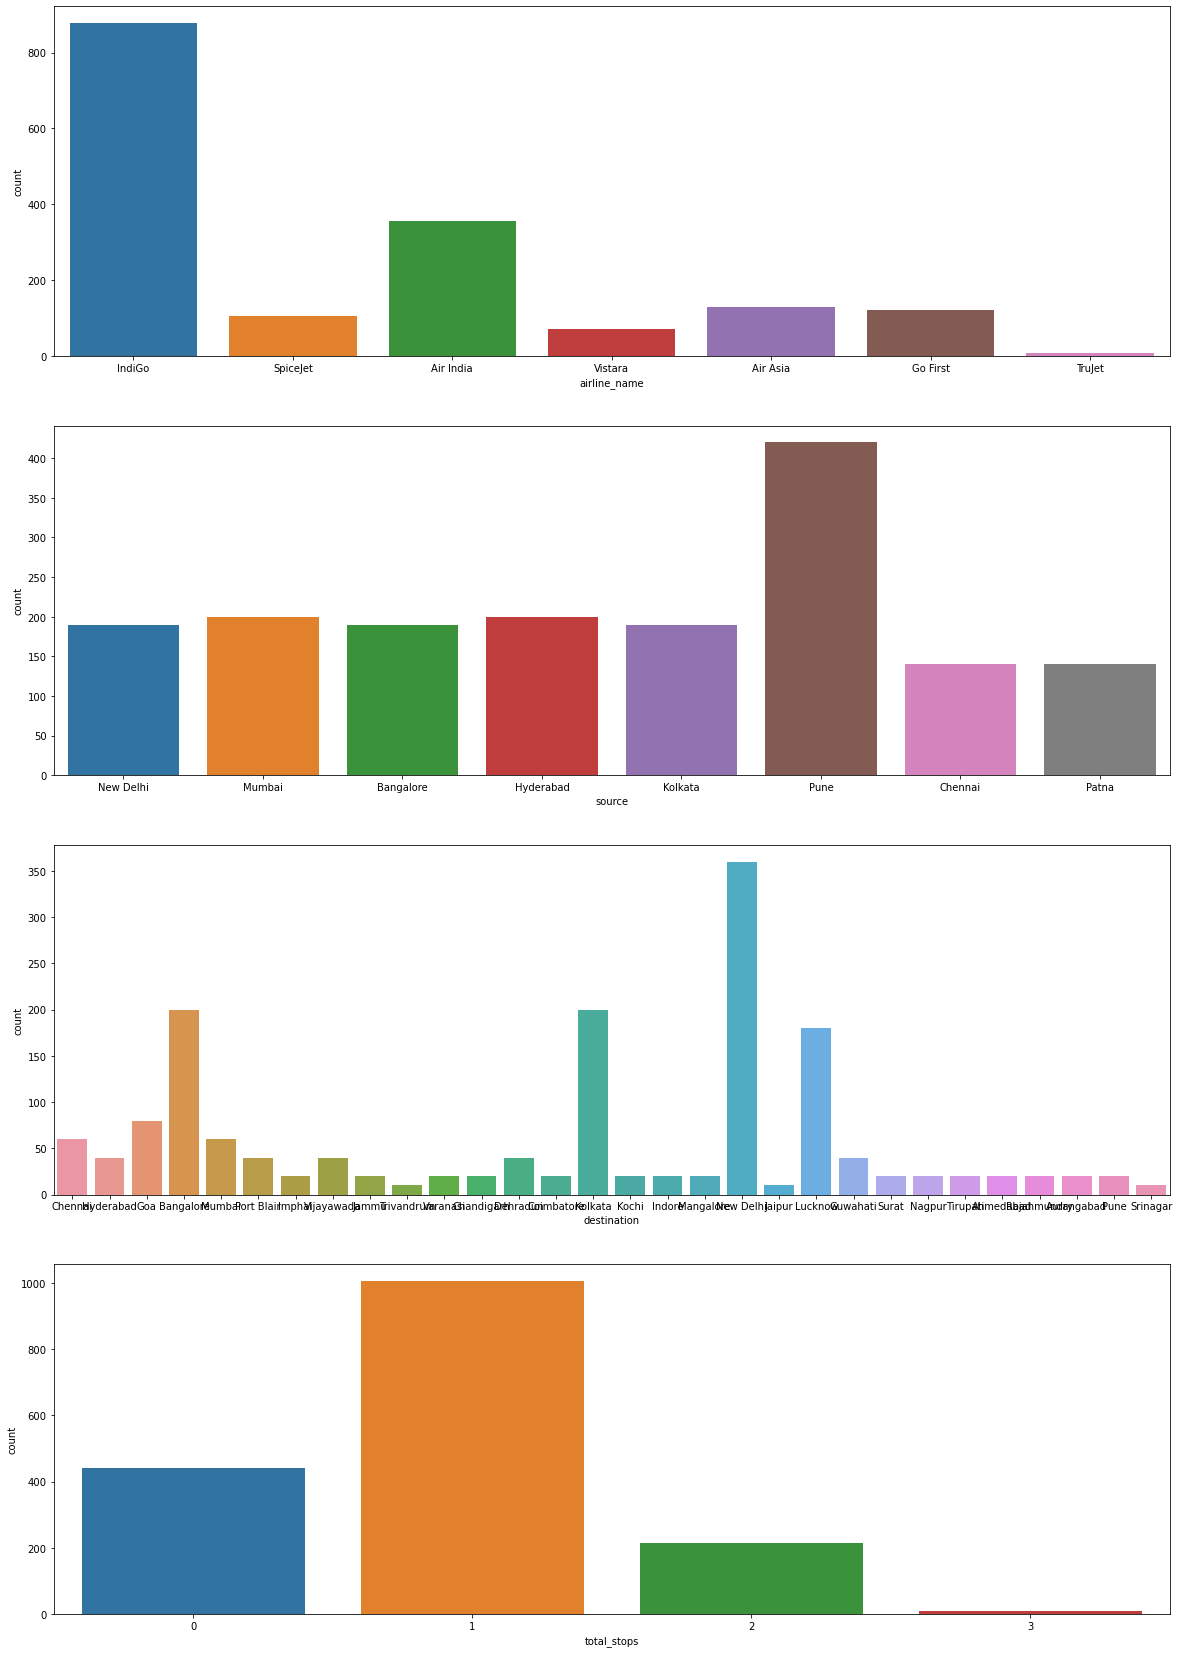

In [439]:
c=1
plt.figure(figsize=(20,45))
for i in category:
    print(i,df[i].unique())
    plt.subplot(6,1,c)
    sns.countplot(df[i])
    c=c+1
plt.show()

In [453]:
numerical = ['total_stops','hours','mins','price','arrival_time_hour','arrival_time_min']

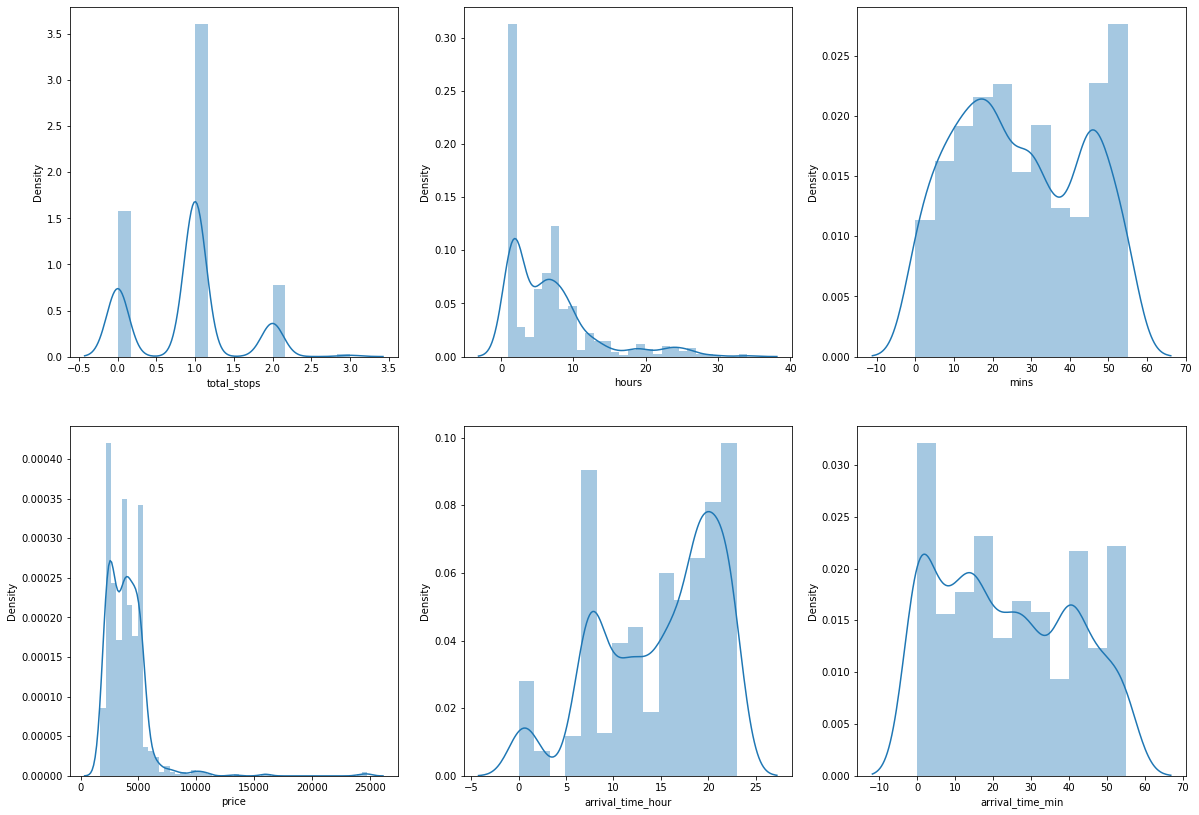

In [454]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

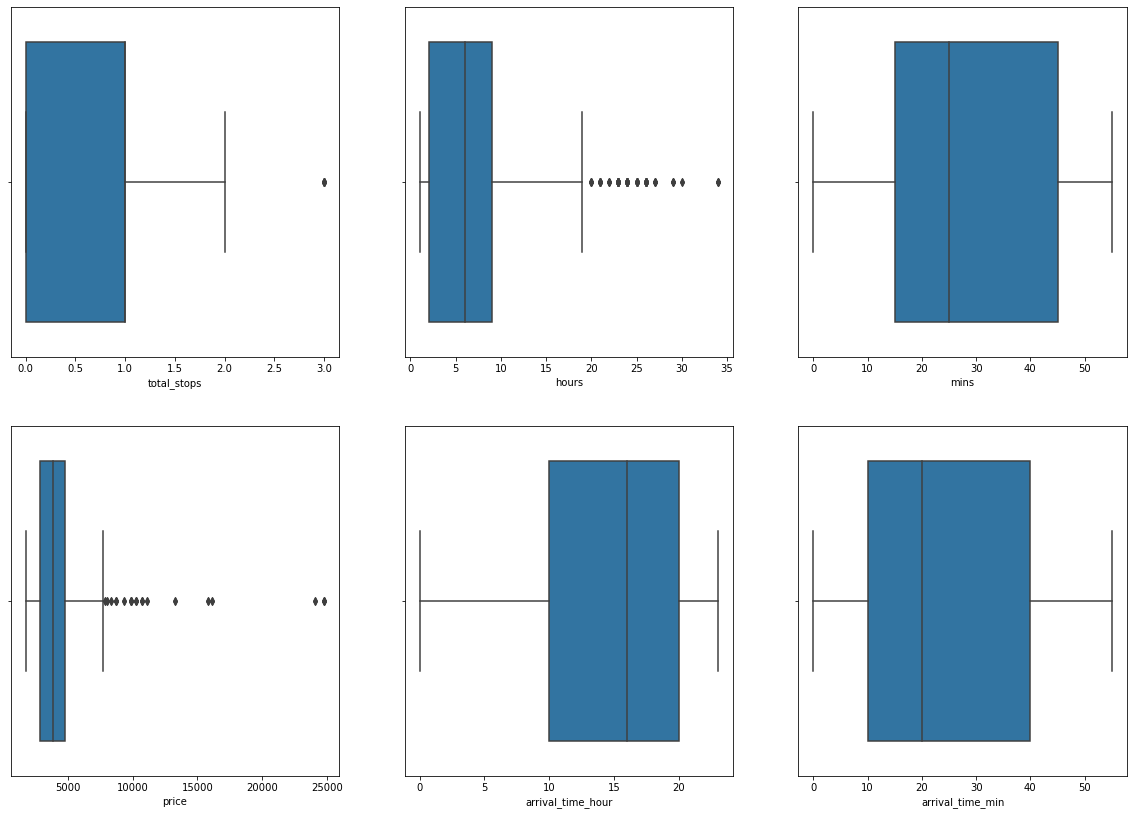

In [455]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.boxplot(df[i])
    c=c+1
plt.show()

In [456]:
df.dtypes

airline_name             int32
date_of_journey          int32
source                   int32
destination              int32
total_stops              int64
price                  float64
month                    int64
hours                    int64
mins                     int64
arrival_time_hour        int64
arrival_time_min         int64
departure_time_hour      int64
departure_time_min       int64
dtype: object

In [457]:
labelencoder = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = labelencoder.fit_transform(df[i])

In [458]:
df

,airline_name,date_of_journey,source,destination,total_stops,price,month,hours,mins,arrival_time_hour,arrival_time_min,departure_time_hour,departure_time_min
0,3,5,5,4,2,2341.0,11,2,50,23,20,20,30
1,4,5,5,4,1,2621.0,11,2,45,21,10,18,25
2,4,5,5,4,1,2621.0,11,2,55,9,10,6,15
3,1,5,5,4,1,2658.0,11,2,55,23,35,20,40
4,6,5,5,4,1,2715.0,11,2,50,16,20,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,1,1,7,16,1,5255.0,11,13,25,8,15,18,50
1666,1,1,7,16,1,5255.0,11,23,30,8,15,8,45
1667,1,1,7,16,1,5255.0,11,24,50,19,40,18,50
1668,2,1,7,16,1,5358.0,11,6,45,22,15,15,30


In [459]:
df.skew()

airline_name           0.176988
date_of_journey        0.336893
source                -0.183893
destination           -0.242211
total_stops            0.218496
price                  5.056007
month                 -1.935512
hours                  1.693226
mins                   0.111451
arrival_time_hour     -0.621548
arrival_time_min       0.225062
departure_time_hour   -0.076729
departure_time_min    -0.196755
dtype: float64

In [460]:
df.hours = np.log(df.hours)
df.hours.skew()

-0.04546726443357991

In [461]:
#Dividing data into X and y variables
y = df.pop('price')
ds_X = df

In [462]:
sc = StandardScaler()
dataset = sc.fit_transform(ds_X)
x=pd.DataFrame(dataset,columns=ds_X.columns)
x

,airline_name,date_of_journey,source,destination,total_stops,month,hours,mins,arrival_time_hour,arrival_time_min,departure_time_hour,departure_time_min
0,0.394714,-0.830585,0.422283,-1.302575,1.788563,0.394737,-0.882603,1.412008,1.296807,-0.194142,1.351160,0.083823
1,1.137863,-0.830585,0.422283,-1.302575,0.199786,0.394737,-0.882603,1.107035,0.977080,-0.770018,0.960806,-0.201859
2,1.137863,-0.830585,0.422283,-1.302575,0.199786,0.394737,-0.882603,1.716982,-0.941278,-0.770018,-1.381313,-0.773221
3,-1.091584,-0.830585,0.422283,-1.302575,0.199786,0.394737,-0.882603,1.716982,1.296807,0.669670,1.351160,0.655185
4,2.624161,-0.830585,0.422283,-1.302575,0.199786,0.394737,-0.882603,1.412008,0.177764,-0.194142,-0.015077,0.083823
...,...,...,...,...,...,...,...,...,...,...,...,...
1665,-1.091584,-1.214552,1.247092,0.272778,0.199786,0.394737,1.152359,-0.112858,-1.101142,-0.482080,0.960806,1.226548
1666,-1.091584,-1.214552,1.247092,0.272778,0.199786,0.394737,1.772637,0.192115,-1.101142,-0.482080,-0.990959,0.940866
1667,-1.091584,-1.214552,1.247092,0.272778,0.199786,0.394737,1.818906,1.412008,0.657354,0.957608,0.960806,1.226548
1668,-0.348435,-1.214552,1.247092,0.272778,0.199786,0.394737,0.311773,1.107035,1.136943,-0.482080,0.375277,0.083823


In [463]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR

In [464]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [465]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [466]:
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 score is ",r2_score(y_test,pred))
        print("R2 score of train data is ",r2_score(y_train,i.predict(x_train))) 
        print("Mean absolute error is  ",mean_absolute_error(y_test,pred))
        print("Mean squared error is  ",mean_squared_error(y_test,pred))
        print("Root mean squared error is  ",(mean_squared_error(y_test,pred,squared=False)))                                

DecisionTreeRegressor()
R2 score is  0.9816702990345492
R2 score of train data is  1.0
Mean absolute error is   55.8063872255489
Mean squared error is   66259.72255489022
Root mean squared error is   257.4096395920134
SVR()
R2 score is  0.004827105644153562
R2 score of train data is  0.005487751884528547
Mean absolute error is   1163.7314985361356
Mean squared error is   3597433.4768719757
Root mean squared error is   1896.6901372844156
LinearRegression()
R2 score is  0.2172114980476414
R2 score of train data is  0.20879042498342903
Mean absolute error is   991.9312544559248
Mean squared error is   2829688.768861247
Root mean squared error is   1682.1678777283935


We achieve the best score using DecisionTreeRegressor, with an r2_score of 98%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model.

We try to use ensemble models to check if our performance improves using ensemble models -


In [468]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [482]:
rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()


In [483]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=100)

In [534]:
for i in [rfr,ad,gd]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print("R2 score is ",r2_score(y_test,pred))
        print("R2 score of train data is ",r2_score(y_train,i.predict(x_train))) 
        print("Mean absolute error is  ",mean_absolute_error(y_test,pred))
        print("Mean squared error is  ",mean_squared_error(y_test,pred))
        print("Root mean squared error is  ",(mean_squared_error(y_test,pred,squared=False)))                                

RandomForestRegressor()
R2 score is  0.8782263751722312
R2 score of train data is  0.9879362660802052
Mean absolute error is   164.7848303393214
Mean squared error is   368845.4422075848
Root mean squared error is   607.3264708602654
AdaBoostRegressor()
R2 score is  0.648073495798716
R2 score of train data is  0.7787447187020624
Mean absolute error is   834.3811140097473
Mean squared error is   1065965.5344109577
Root mean squared error is   1032.456068998075
GradientBoostingRegressor()
R2 score is  0.8188330187079187
R2 score of train data is  0.9534687382590626
Mean absolute error is   328.76637810988314
Mean squared error is   548744.5694632307
Root mean squared error is   740.772954057605


Random Forest model gives us the best accuracy, with an R2 score of 89%, but the model is overfitting on train data.
We will try to tune this model to check if we can remove overfitting.
Mean Absolute error for this model is ~155 and RMSE ~ 558.
Gradient boosting also gives a score of 82%, which is better than K-Neighbors and the model is not overfitting as well.
The model has mean absolute error as ~328 and RMSE as ~728 (near to Random forest)

# Cross Validation

In [486]:
for i in range(2,9):
    cv = cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.9020239472529461
RandomForestRegressor() 0.9344588444204192
RandomForestRegressor() 0.9390349949481516
RandomForestRegressor() 0.7649661572390641
RandomForestRegressor() 0.7184019884465753
RandomForestRegressor() 0.8038046470443642
RandomForestRegressor() 0.8100356075603394


In [516]:
for i in range(2,9):
    cv = cross_val_score(gd,x,y,cv=i)
    print(gd,cv.mean())

GradientBoostingRegressor() 0.8680244322020222
GradientBoostingRegressor() 0.8910373042960199
GradientBoostingRegressor() 0.8802754071494959
GradientBoostingRegressor() 0.7612013848293102
GradientBoostingRegressor() 0.7869056107285773
GradientBoostingRegressor() 0.7132607745484062
GradientBoostingRegressor() 0.7856123807897262


The Random Forest Regressor provides us a cross validation score of 93%, and gradient boosting regressor gives a score of 89%. We will hypertune both the models to check if our accuracy improves.

# Hypertuning the model

GridSearch CV is a technique used to validate the model with different parameter combinations, by creating a grid of parameters and trying all the combinations to compare which combination gave the best results. We apply grid search on our model –

In [488]:
#import GridsearchCV
from sklearn.model_selection import GridSearchCV

In [496]:
param_grid = {'n_estimators':[10,30,50,70],
             'max_depth':[None,1,2,3],
             'max_samples':[50,100,250,500,1000],
             'min_samples_split':[2,4,10]}
gcv_rfr = GridSearchCV(rfr,param_grid,cv=3)

In [497]:
res = gcv_rfr.fit(x_train,y_train)

In [498]:
res.best_params_

{'max_depth': None,
 'max_samples': 500,
 'min_samples_split': 4,
 'n_estimators': 30}

In [529]:
param_grid2 = {'alpha':[0.9,0.09,0.],
             'learning_rate':[0.1,0.01],
             'max_depth':[3,4,5],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[2,3,4],
             'n_estimators':[10,50,100]}
gcv_gd = GridSearchCV(gd,param_grid2,cv=3)

In [530]:
res2 = gcv_gd.fit(x_train,y_train)

In [531]:
res2.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [542]:
model = GradientBoostingRegressor(alpha= 0.9,learning_rate= 0.1,max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)

In [544]:
import joblib
joblib.dump(model,'flight_price.obj')
model_1

GradientBoostingRegressor(max_depth=4)

In [548]:
model1 = GradientBoostingRegressor(alpha= 0.9,learning_rate= 0.1,max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100).fit(x_train,y_train)



In [550]:
pred = model1.predict(x_test)


In [551]:
pred_values = pd.DataFrame({'Actual_price':y_test,'Predict':pred})

In [552]:
pred_values

,Actual_price,Predict
1305,3653.0,3746.517085
185,2843.0,2846.922058
173,1901.0,2197.997899
1167,3429.0,3181.966883
1227,10274.0,10223.510808
...,...,...
1444,4949.0,4814.385524
588,3828.0,3887.608769
108,4291.0,4531.279405
1295,5307.0,5199.032464
